In [ ]:
print("hello dijon")

hello dijon


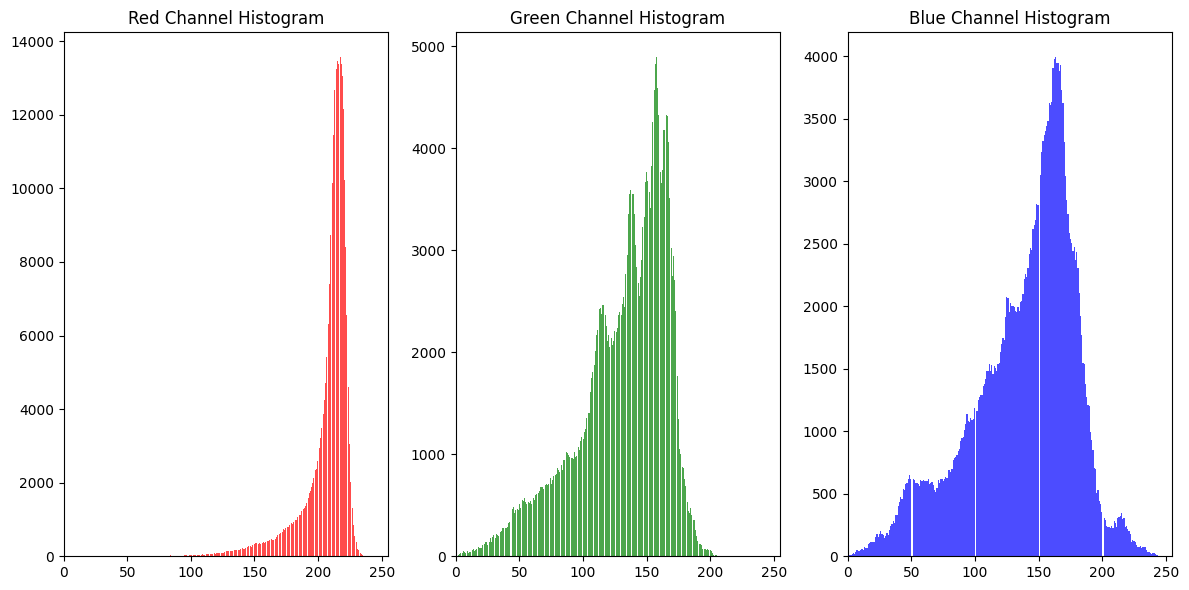

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/lesion.jpg'


img = Image.open(image_path)


img_array = np.array(img)


red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]


plt.figure(figsize=(12, 6))

# Red
plt.subplot(1, 3, 1)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlim([0, 255])

# Green
plt.subplot(1, 3, 2)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlim([0, 255])

# Blue
plt.subplot(1, 3, 3)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

Ex 1:
Image Width: 600
Image Height: 450


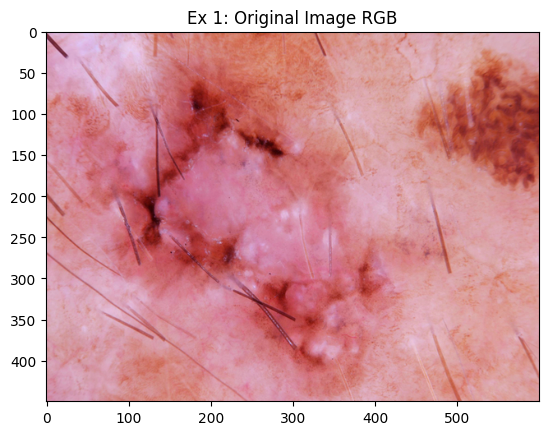

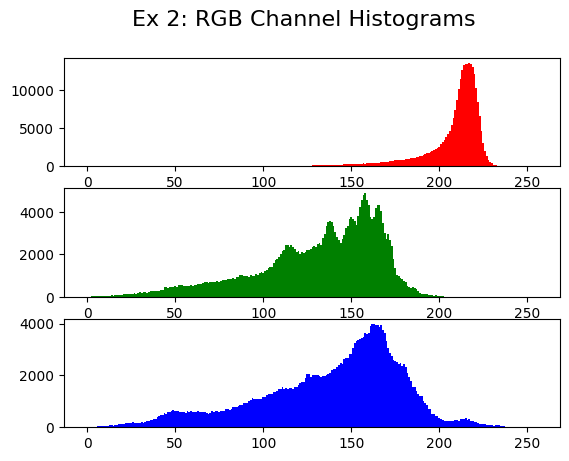

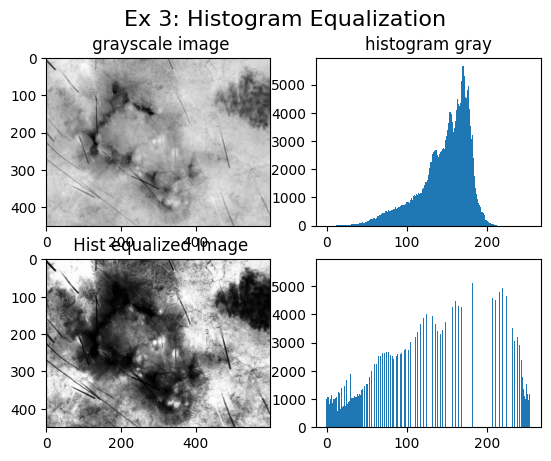

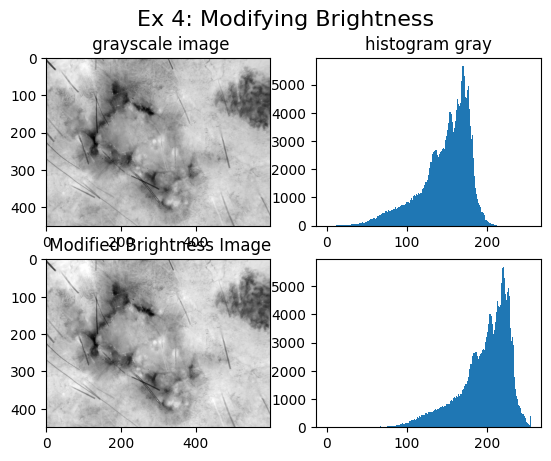

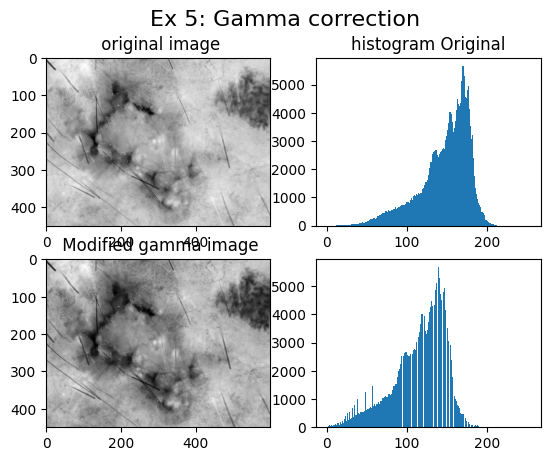

In [ ]:
import os
from statistics import median

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pydicom
from scipy import ndimage
from skimage import exposure, io
from skimage.color import rgb2gray
from skimage.exposure import match_histograms
from skimage.filters import sobel

dir_path = '/content/lesion.jpg'
fname = '/content/lesion.jpg'
fnameDicom = '/content/pano.dcm'
fnameNoise = '/content/lesion_noise.jpg'
img = io.imread(fname)
img_noise = io.imread(fnameNoise)



############## Ex 1 ##############

print("Ex 1:")
print(f"Image Width: {img.shape[1]}")
print(f"Image Height: {img.shape[0]}")

fig, ax = plt.subplots(1)
plt.imshow(img)
plt.title('Ex 1: Original Image RGB')
plt.show(block = False)

############## Ex 2 ##############
image_red, image_green, image_blue = img[:, :, 0], img[:, :, 1], img[:, :, 2]

fig, ax = plt.subplots(3)
fig.suptitle('Ex 2: RGB Channel Histograms', fontsize=16)

bins = np.arange(-0.5, 255+1,1)
ax[0].hist(image_red.flatten(), bins = bins , color='r')
ax[1].hist(image_green.flatten(), bins = bins , color='g')
ax[2].hist(image_blue.flatten(), bins = bins , color='b')

plt.show(block = False)

############## Ex 3 ##############

img_gray = np.uint8(rgb2gray(img)*255)

# Equalization
img_eq = exposure.equalize_hist(img_gray)
img_eq = np.uint8( img_eq*255)
fig, ax    = plt.subplots(2,2)
fig.suptitle('Ex 3: Histogram Equalization', fontsize=16)

plt.subplot(221)
plt.title(' grayscale image')
plt.imshow(img_gray, cmap="gray")

plt.subplot(222)
plt.title('histogram gray')
bins = np.arange(-0.5, 255+1,1)
plt.hist(img_gray.flatten(), bins = bins)

plt.subplot(223)
plt.title(' Hist equalized Image')
plt.imshow(img_eq, cmap="gray")

plt.subplot(224)
bins = np.arange(-0.5, 255+1,1)
plt.hist(img_eq.flatten(), bins = bins)

plt.show(block = False)


############## Ex 4 ##############

brightnessValue = 50

img_gray_brightness                            = np.uint16(img_gray) + brightnessValue
img_gray_brightness[img_gray_brightness > 255] = 255
img_gray_brightness                            = np.uint8(img_gray_brightness)

fig, ax = plt.subplots(2,2)
fig.suptitle('Ex 4: Modifying Brightness', fontsize=16)

plt.subplot(221)
plt.title(' grayscale image')
plt.imshow(img_gray, cmap="gray")

plt.subplot(222)
plt.title('histogram gray')
bins = np.arange(-0.5, 255+1,1)
plt.hist(img_gray.flatten(), bins = bins)

plt.subplot(223)
plt.title(' Modified Brightness Image')
plt.imshow(img_gray_brightness, cmap="gray")

plt.subplot(224)
bins = np.arange(-0.5, 255+1,1)
plt.hist(img_gray_brightness.flatten(), bins = bins)

plt.show(block = False)


############## Ex 5 ##############
GammaValue = 1.5

img_gray_Gamma = np.uint8(np.power(np.double(img_gray)/255, GammaValue)*255)

img_gray_Gamma = np.uint8(img_gray_Gamma)
fig, ax = plt.subplots(2,2)
fig.suptitle('Ex 5: Gamma correction', fontsize=16)


plt.subplot(221)
plt.title(' original image')
plt.imshow(img_gray, cmap="gray")

plt.subplot(222)
plt.title('histogram Original')
bins = np.arange(-0.5, 255+1,1)
plt.hist(img_gray.flatten(), bins = bins)

plt.subplot(223)
plt.title(' Modified gamma image')
plt.imshow(img_gray_Gamma, cmap="gray")

plt.subplot(224)
bins = np.arange(-0.5, 255+1,1)
plt.hist(img_gray_Gamma.flatten(), bins = bins)

plt.show(block = False)




In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.9 MB/s eta 0:00:00
